In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('movies_metadata.csv')

C:\Users\preet\AppData\Local\Temp\ipykernel_1640\2089594497.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [ ]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

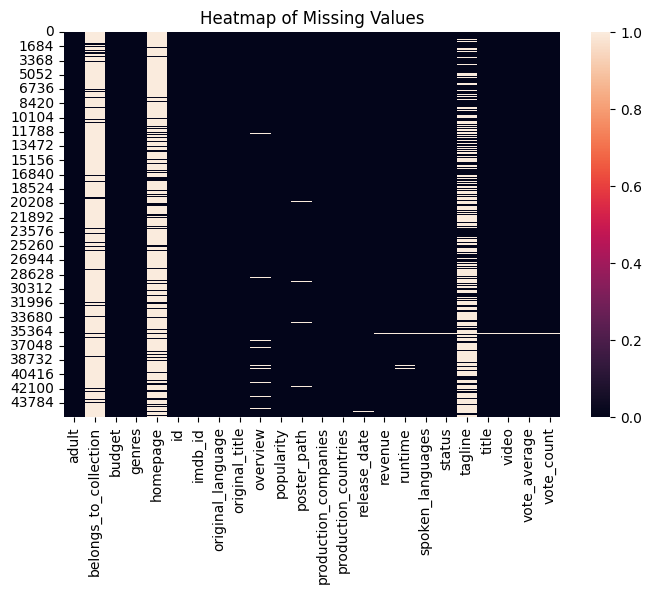

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull())
plt.title("Heatmap of Missing Values")
plt.show()

In [ ]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

In [ ]:
df["release_year"] = df["release_date"].dt.year
df['release_month'] = df['release_date'].dt.month

In [ ]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

In [ ]:
df['primary_genre'] = df['genres'].str.split("'name': '").str[1].str.split("'").str[0]

In [ ]:
df = df[(df['budget'] > 1000) & (df['revenue'] > 1000)]

In [ ]:
df.shape

(5312, 27)

In [ ]:
df = df.dropna(subset=['budget', 'revenue', 'runtime', 'primary_genre', 'release_year', 'release_month'])

In [ ]:
df.shape

(5300, 27)

In [ ]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

In [ ]:
df.dtypes

adult                            object
belongs_to_collection            object
budget                          float64
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
release_year                    float64


In [ ]:
df['roi'] = (df['revenue'] - df['budget']) / df['budget']

In [ ]:
df_selected = df[['budget', 'runtime', 'vote_average', 'vote_count', 'popularity', 'release_year', 'release_month', 'roi','primary_genre','revenue']]

In [ ]:
df_selected.to_csv('Rf_data.csv', index=False)

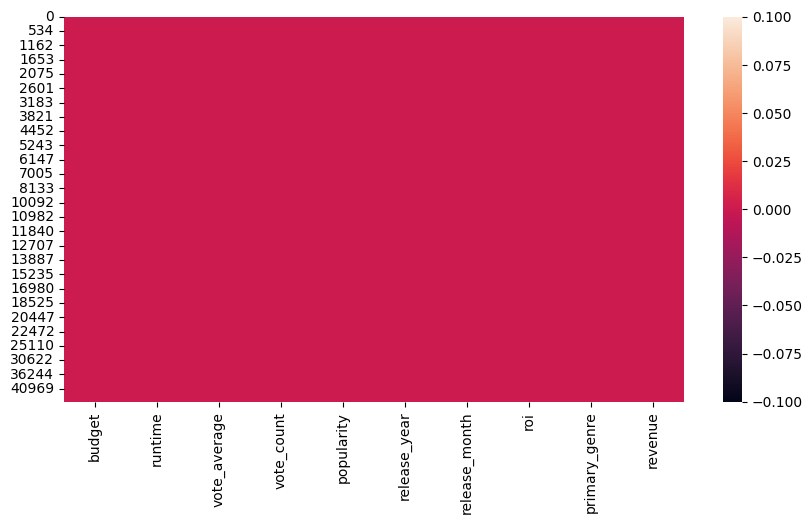

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_selected.isnull())
plt.show()

In [ ]:
df = pd.read_csv('Rf_data.csv')

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull())
plt.title("Heatmap of Missing Values")
plt.show()

In [ ]:
genre_revenue = df.groupby('primary_genre')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values)
plt.xticks(rotation=90)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['vote_count'], y=df['revenue'], alpha=0.5)
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['popularity'], y=df['revenue'], alpha=0.5)
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['primary_genre'])

In [ ]:
genre_columns = [col for col in df.columns if col.startswith("primary_genre_")]

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['revenue'])
y = df['revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

In [ ]:
import pickle as pk

In [ ]:
with open('rf_model.pkl', 'wb') as file:
    pk.dump(rf_model, file)

In [ ]:
with open('feature_names.pkl', 'wb') as file:
    pk.dump(X.columns.tolist(), file)